In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
df = pd.read_csv('train.csv')
df_y = pd.read_csv('trainLabels.csv')
test = pd.read_csv('test.csv', header=None)

# EDA

In [3]:
df.sample(3)

,0.29940251144353242,-1.2266241875260637,1.4984250500215328,-1.1761503610375272,5.2898525545597037,0.20829711393323402,2.4044983672405826,1.5945062220589785,-0.051608163273514231,0.66323431039687908,...,-0.85046544625016463,-0.62298999638261954,-1.8330573433160038,0.29302438506869571,3.5526813410266507,0.71761099417552265,3.3059719748508889,-2.7155588147154619,-2.6824085866346223,0.10105047232890663
857,0.115963,-0.400382,0.084487,-0.098804,-0.954852,0.855194,-1.199448,0.273162,-0.450954,0.006043,...,1.303113,0.535641,1.078597,-0.117480,0.897063,-0.075010,2.300344,0.280320,0.460573,0.034511
13,-1.490144,-0.083501,-2.019965,0.176877,-0.667091,-0.331570,2.825235,-6.509084,0.052303,-0.753188,...,0.179950,-0.617409,-2.829893,-0.387952,-0.650317,0.380046,2.574737,1.306999,-1.095771,1.511478
660,-0.441670,0.564110,-0.822037,0.469985,1.900393,0.429185,3.219685,-0.036800,-0.162739,0.629508,...,0.395620,-1.380777,1.758039,1.641833,-2.645026,-1.987456,3.692477,0.811575,-3.744552,-0.620507


In [4]:
df.shape, df_y.shape

((999, 40), (999, 1))

In [5]:
df.columns, df_y.columns

(Index(['0.29940251144353242', '-1.2266241875260637', '1.4984250500215328',
        '-1.1761503610375272', '5.2898525545597037', '0.20829711393323402',
        '2.4044983672405826', '1.5945062220589785', '-0.051608163273514231',
        '0.66323431039687908', '-1.4083700642531511', '1.1147436351160869',
        '0.91041530967390116', '2.2181103179158135', '4.3056427290235391',
        '0.088923978050666208', '0.1691492586690862', '0.41344763764684195',
        '1.5138621708864943', '2.6629665829474161', '-1.0727654812214888',
        '0.14911112051014644', '0.55957919164070269', '4.3788846423749064',
        '-0.4636026556416834', '-0.063959155289009084', '0.54493030536966891',
        '0.71277166708074502', '-1.4940501263538932', '-2.6361688752136554',
        '-0.85046544625016463', '-0.62298999638261954', '-1.8330573433160038',
        '0.29302438506869571', '3.5526813410266507', '0.71761099417552265',
        '3.3059719748508889', '-2.7155588147154619', '-2.6824085866346223',
     

In [6]:
df.columns = [f"col{i+1}" for i in range(df.shape[1])]
df_y.columns = ['label']
# df = pd.concat([df, df_y], axis=1);

In [7]:
df.columns

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9',
       'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17',
       'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25',
       'col26', 'col27', 'col28', 'col29', 'col30', 'col31', 'col32', 'col33',
       'col34', 'col35', 'col36', 'col37', 'col38', 'col39', 'col40'],
      dtype='object')

In [8]:
df.dtypes.unique()

array([dtype('float64')], dtype=object)

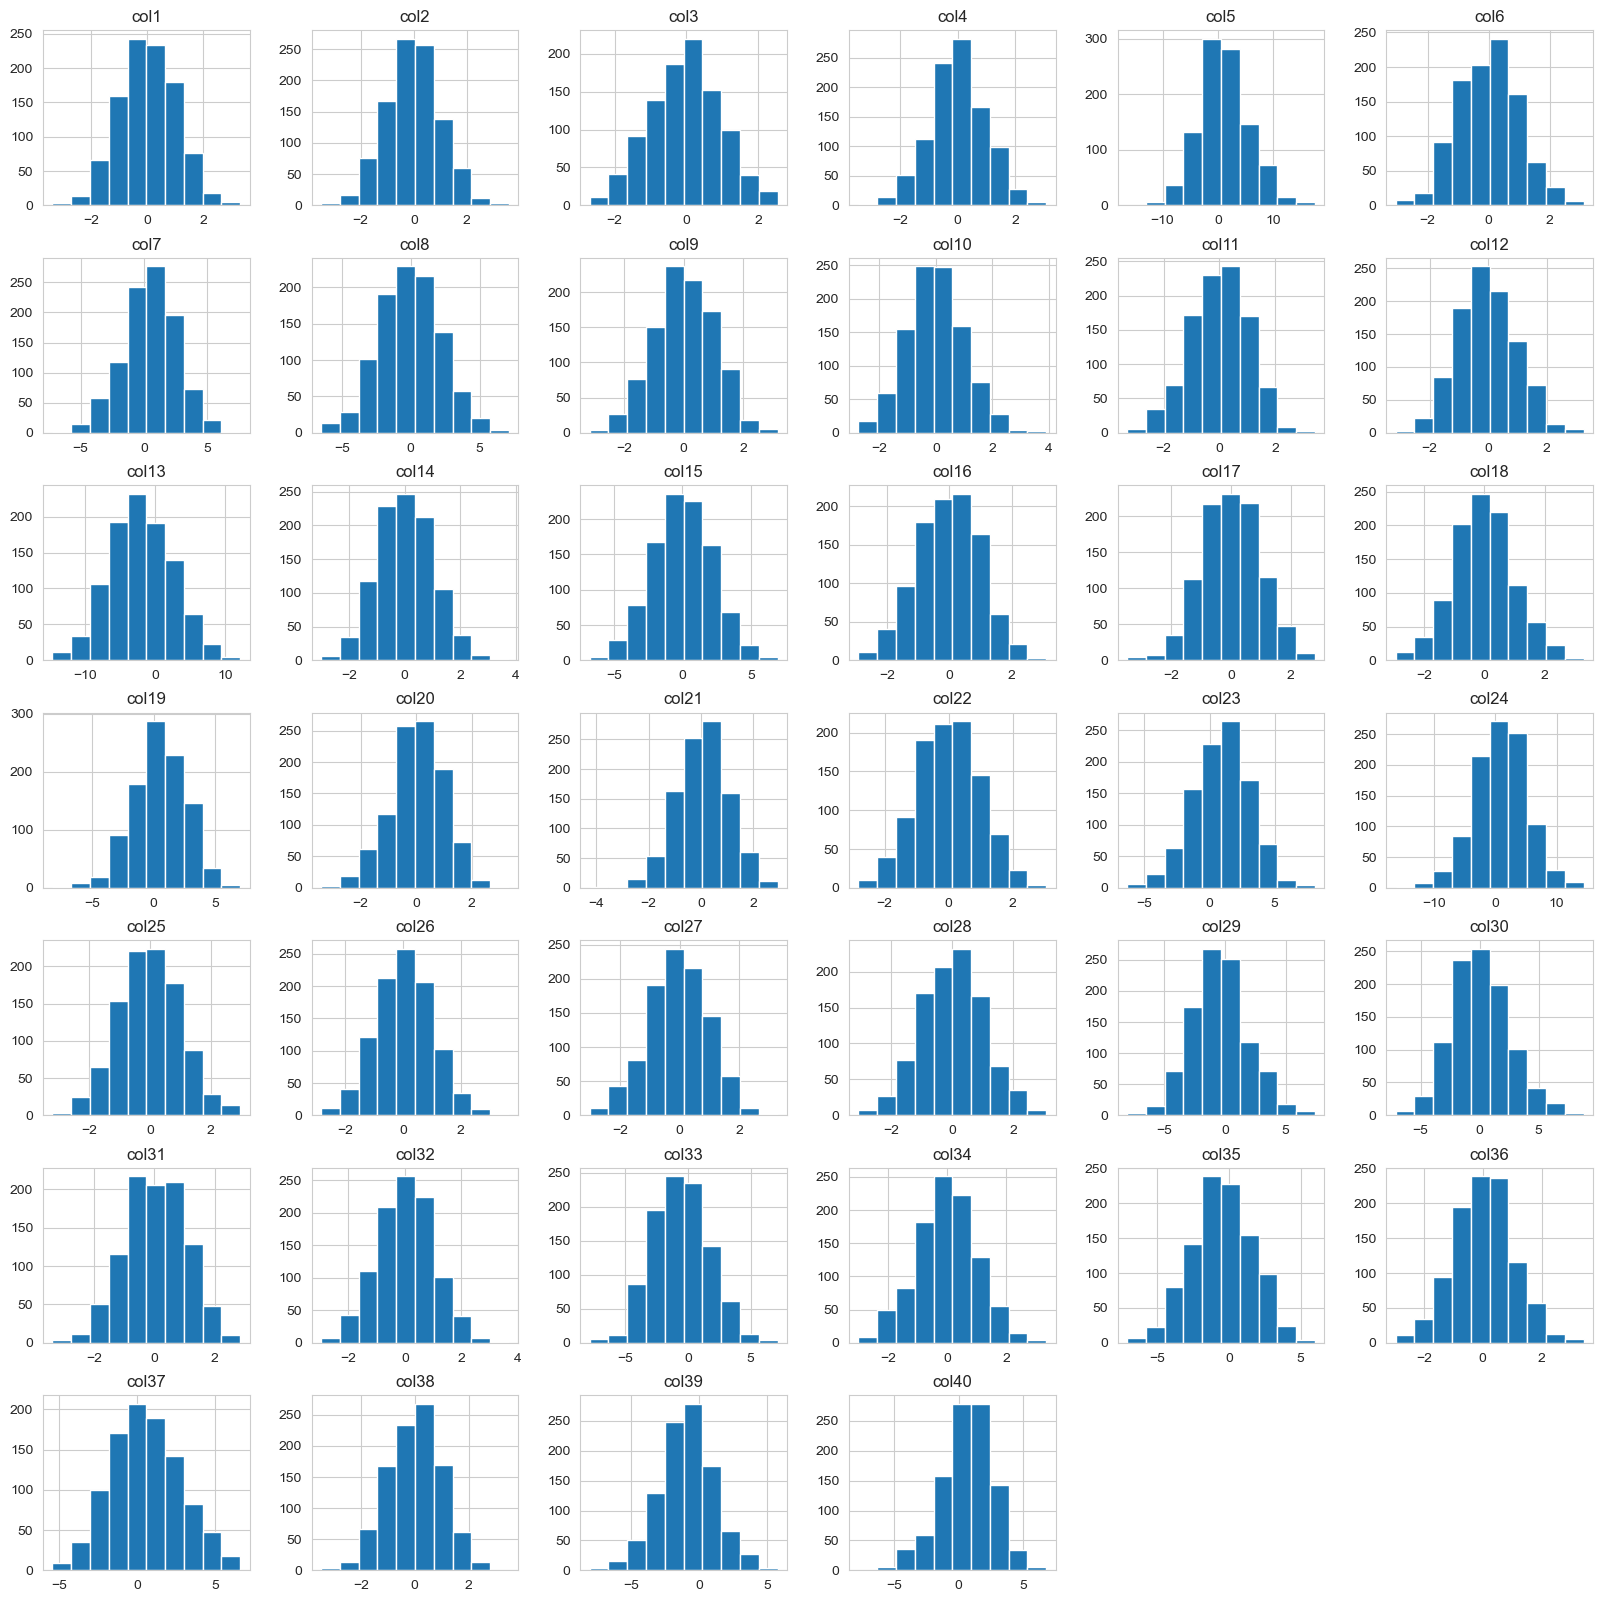

In [9]:
df.hist(figsize=(20,20));

In [10]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
col1,999.0,0.025322,1.008750,-3.365711,-0.670358,0.023121,0.762980,3.326246
col2,999.0,-0.023323,1.016094,-3.492086,-0.690859,-0.031181,0.683464,3.583870
col3,999.0,-0.025612,0.978412,-2.695602,-0.700048,0.008037,0.657948,2.546507
col4,999.0,-0.001096,0.970349,-3.460471,-0.616548,0.003735,0.640968,3.088738
col5,999.0,1.088127,4.539161,-16.421901,-1.805683,0.858932,3.836911,17.565345
col6,999.0,-0.006465,0.989601,-3.041250,-0.733114,0.025803,0.671494,3.102997
col7,999.0,0.495433,2.119020,-7.224761,-0.839542,0.571475,1.912284,7.592666
col8,999.0,-0.039517,2.232776,-6.509084,-1.607010,0.017761,1.436715,7.130097
col9,999.0,0.026469,1.001562,-3.145588,-0.680114,0.022855,0.741949,3.145258
col10,999.0,-0.004264,1.013808,-2.749812,-0.682246,-0.037531,0.666416,3.919426


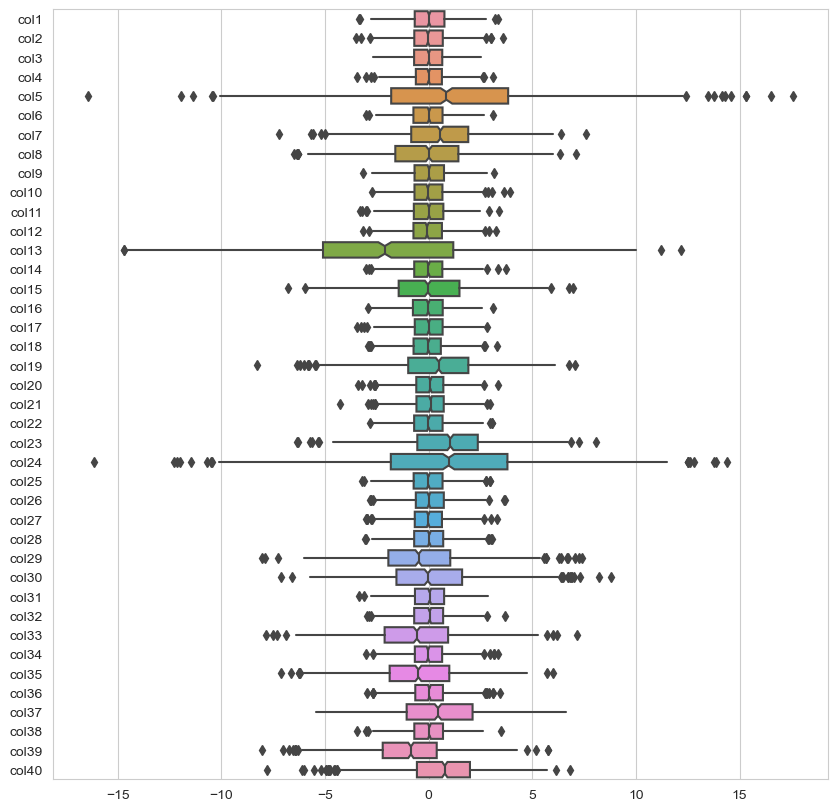

In [11]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df,
            notch=True,
            showcaps=False,
            orient='h'
)

<AxesSubplot: xlabel='label', ylabel='count'>

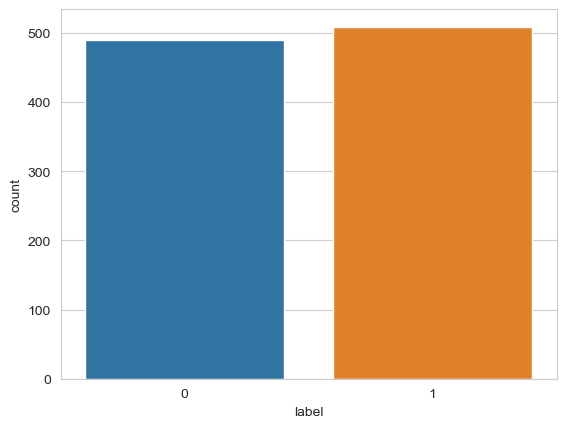

In [12]:
sns.countplot(data=df_y, x='label')

In [13]:
df.isnull().sum().value_counts()

0    40
dtype: int64

In [14]:
# no nulls

In [15]:
# check for correlation

<AxesSubplot: >

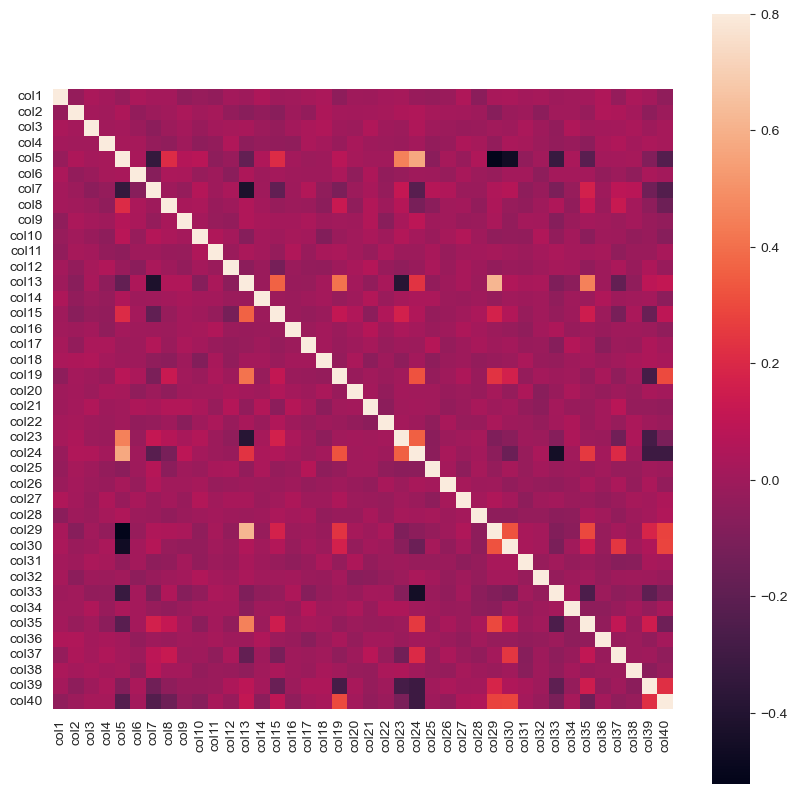

In [16]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, vmax = .8, square=True)

In [17]:
#no significant correlation between any of variables

# EDA concluions:
     - dataset is balanced
     - no significant correlation between any of the independent variables
     - no missing values
     - little to none outliers
     - data is normally distributed

# Feature engineering
#### Will try: normalize data, PCA

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(df.values)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_train, df_y,
                test_size=0.2, random_state=0, shuffle=True)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((799, 40), (200, 40), (799, 1), (200, 1))

In [21]:
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
test = pca.fit_transform(test)

explained_variance = pca.explained_variance_ratio_

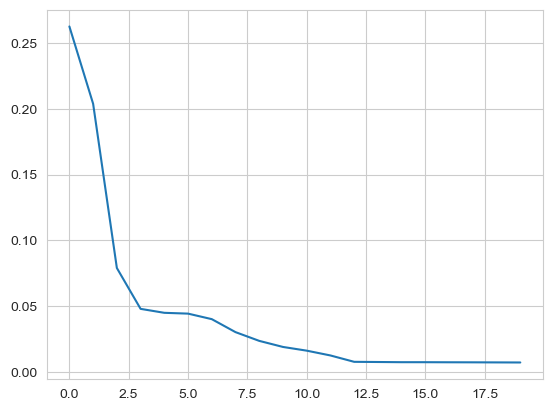

In [22]:
plt.plot(explained_variance)

# Build classification model

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [24]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train);

nb = GaussianNB()
nb.fit(X_train, y_train);

l_reg = LogisticRegression()
l_reg.fit(X_train, y_train);

# Cross validation

In [25]:
from sklearn.model_selection import KFold, cross_val_score

The data is:
- balanced
- ungrouped

KFold is a good choice for this kind of data

In [26]:
kf = KFold(n_splits=5, shuffle=True, random_state=529)

In [27]:
from sklearn.model_selection import GridSearchCV

## Random Forest Grid Search

In [28]:
rf_params = [{
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2']
}]

rf_grid_search = GridSearchCV(rf, param_grid=rf_params, cv=kf, scoring='accuracy', return_train_score=True)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=529, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [100, 200, 300]}],
             return_train_score=True, scoring='accuracy')

In [29]:
rf_best_estimator = rf_grid_search.best_estimator_
print(rf_best_estimator)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=300)


In [30]:
rf_score = rf_best_estimator.score(X_test, y_test)

## Logistic Regression Grid Search

In [ ]:
l_reg_params = [{
    'penalty': ['l1', 'l2', 'elasticnet', 'None'],
    'solver': ['liblinear', 'netwon-cholesky', 'saga']
}]

l_reg_grid_search = GridSearchCV(l_reg, param_grid=l_reg_params, cv=kf, scoring='accuracy', return_train_score=True)
l_reg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=529, shuffle=True),
             estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                          'solver': ['liblinear', 'netwon-cholesky', 'saga']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
l_reg_best_estimator = l_reg_grid_search.best_estimator_
l_reg_score = l_reg_best_estimator.score(X_test, y_test)

## Gaussian Naive Bayes

In [ ]:
nb_params = [{}]

nb_grid_search = GridSearchCV(nb, scoring='accuracy', cv=kf, return_train_score=True, param_grid=nb_params)
nb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=529, shuffle=True),
             estimator=GaussianNB(), param_grid=[{}], return_train_score=True,
             scoring='accuracy')

In [ ]:
nb_best_estimator = nb_grid_search.best_estimator_
nb_score = nb_best_estimator.score(X_test, y_test)

### Get probabilities

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf_grid_search.predict_proba(X_test)
nb_probs = nb_grid_search.predict_proba(X_test)
l_reg_probs = l_reg_grid_search.predict_proba(X_test)

rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
l_reg_probs = l_reg_probs[:, 1]

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
l_reg_auc = roc_auc_score(y_test, l_reg_probs)

In [ ]:
print('Random chance = %.3f ' % (r_auc))
print('Random forest = %.3f' % (rf_auc))
print('Gaussian Naive Bayes = %.3f' % (nb_auc))
print('Logistic Regression = %.3f' % (l_reg_auc))

Random chance = 0.500 
Random forest = 0.906
Gaussian Naive Bayes = 0.879
Logistic Regression = 0.874


### Plot ROC Curve

In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
l_reg_fpr, l_reg_tpr, _ = roc_curve(y_test, l_reg_probs)

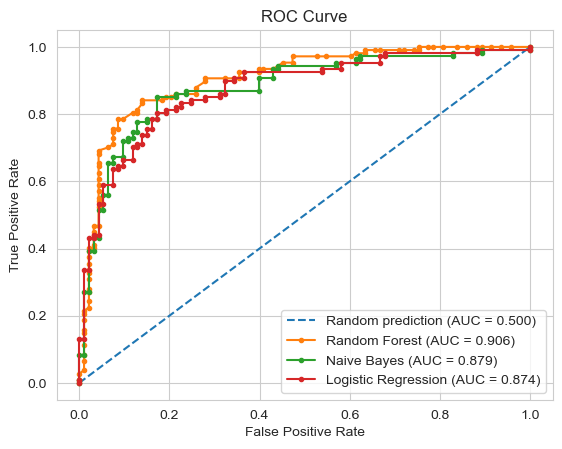

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUC = %0.3f)' % nb_auc)
plt.plot(l_reg_fpr, l_reg_tpr, marker='.', label='Logistic Regression (AUC = %0.3f)' % l_reg_auc)

img = plt.imread('john_xina.jpeg')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() # 
# plt.imshow(img, extent=[0, 1000, 0, 1000])
plt.show()

# Evaluation

In [ ]:
results = pd.DataFrame(data={'Naive Bayes': [nb_score], 'Logistic Regression': [l_reg_score], 'Random Forest': [rf_score]})
results

,Naive Bayes,Logistic Regression,Random Forest
0,0.82,0.805,0.825


In [ ]:
rf_best_pred = pd.DataFrame(rf_grid_search.best_estimator_.predict(X_test))
nb_best_pred = pd.DataFrame(nb_grid_search.best_estimator_.predict(X_test))
l_reg_best_pred = pd.DataFrame(l_reg_grid_search.best_estimator_.predict(X_test))

In [ ]:
rf_best_pred.index += 1
nb_best_pred.index += 1
l_reg_best_pred.index += 1

In [ ]:
rf_best_pred.columns = ['Solution']
rf_best_pred['Id'] = np.arange(1,rf_best_pred.shape[0]+1)
rf_best_pred = rf_best_pred[['Id', 'Solution']]
print(rf_best_pred)

      Id  Solution
1      1         1
2      2         0
3      3         0
4      4         1
5      5         0
..   ...       ...
196  196         0
197  197         1
198  198         0
199  199         1
200  200         1

[200 rows x 2 columns]


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps=[('Rescaling', StandardScaler()), ('PCA',PCA(n_components=20)), ('RandomForest', rf_best_estimator)])
pipe.fit(df, df_y.label)

Pipeline(steps=[('Rescaling', StandardScaler()), ('PCA', PCA(n_components=20)),
                ('RandomForest',
                 RandomForestClassifier(max_features='log2',
                                        n_estimators=300))])

In [ ]:
submit_dict = {'Id': np.arange(1, 9001), 'Solution' : pd.Series(pipe.predict(test))}
my_submission = pd.DataFrame(submit_dict)
# my_submission.to_csv('submission.csv', index=False)
my_submission

,Id,Solution
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
8995,8996,1
8996,8997,1
8997,8998,1
8998,8999,0
